In [2]:
#Import Libraries 
import os
import numpy as np
import pandas as pd

from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib
from IPython.display import display
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from yellowbrick.target import FeatureCorrelation
import warnings

warnings.filterwarnings("ignore")

In [5]:
import plotly.express as px

# Load data

In [4]:
#load data by genre 
genre_data=pd.read_csv("data_by_genres.csv")
genre_data.head(5)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [5]:
#load data by year 
data_year=pd.read_csv("data_by_year.csv")
data_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [6]:
#load data file
data=pd.read_csv("data.csv")
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [7]:
#load artist data 
artist_data=pd.read_csv("data_by_artist.csv")
artist_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [24]:
list_df=[genre_data, data_year, data, artist_data]

In [25]:
list_df=[genre_data, data_year, data, artist_data]
for df in list_df:
    display(df.head(2))
    print("------" * 17)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


------------------------------------------------------------------------------------------------------


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


------------------------------------------------------------------------------------------------------


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


------------------------------------------------------------------------------------------------------


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690,0.176212,103.044154,0.268865,30.576923,5


------------------------------------------------------------------------------------------------------


## General info about the data

In [26]:

for df in [data_year, data]:
    display(df.info())
    print("---" * 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


None

---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity      

None

---------------------------------------------------


In [27]:
# Created a decade column- to group songs by decades 
data_year['decade'] = data_year['year'].apply(lambda x : f"{int(x/10)* 10}s")
data_year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,decade
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2,1920s
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10,1920s
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0,1920s
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1920s
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0,2010s
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1,2010s
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1,2010s
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1,2010s


# STEP TWO !!!!

## EDA process

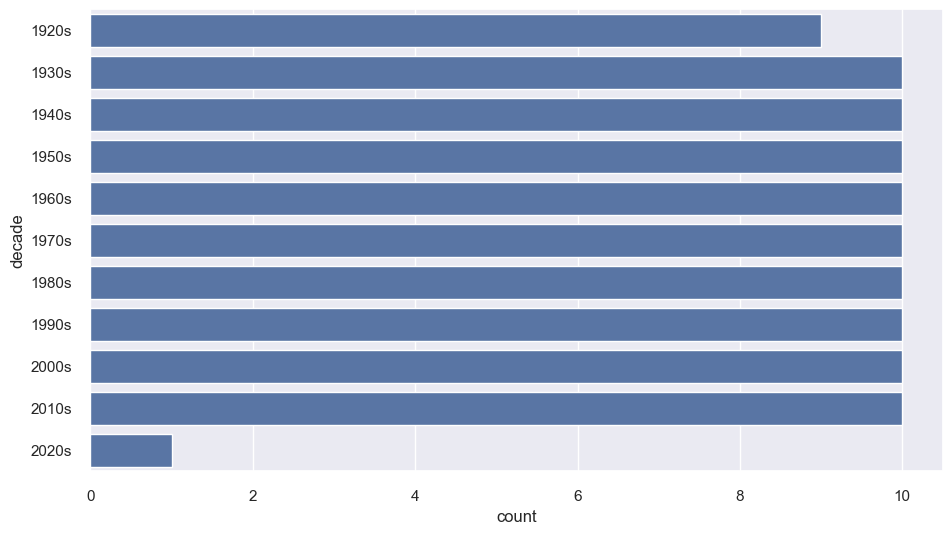

In [28]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data_year['decade'])
plt.show()

In [29]:
#I envcountered error with tis - i used sns and matplotlib 
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(data_year, x='decade', y=sound_features, title='Trend of various sound features over decades')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

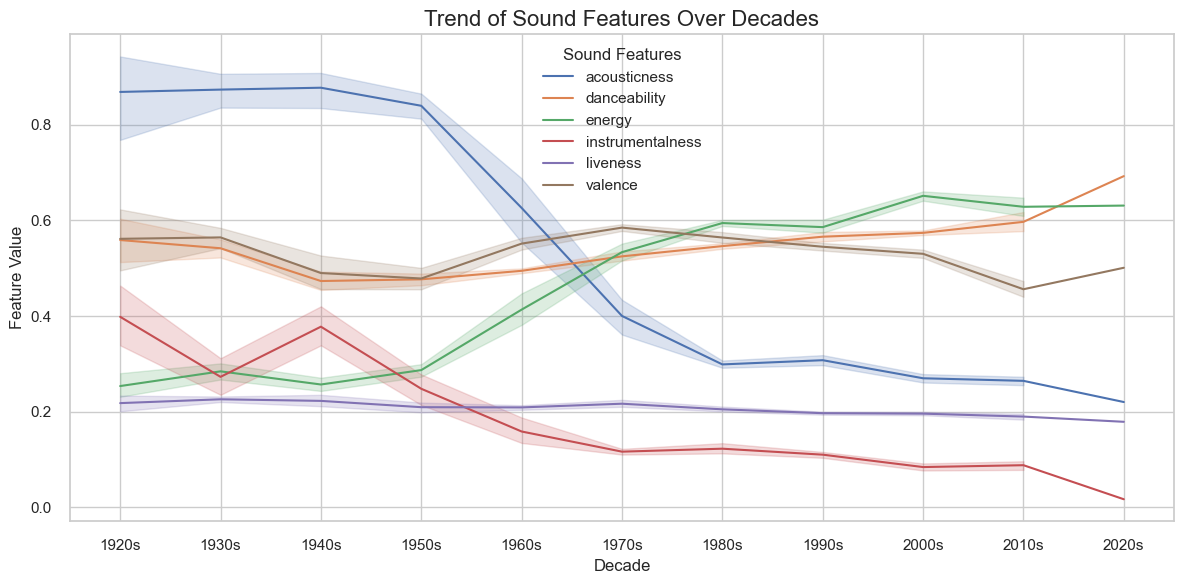

In [16]:
# Defining the sound features to plot
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

# Set the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot each feature as a line
for feature in sound_features:
    sns.lineplot(data=data_year, x='decade', y=feature, label=feature)

# Customising  the plot
plt.title('Trend of Sound Features Over Decades', fontsize=16)
plt.xlabel('Decade')
plt.ylabel('Feature Value')
plt.legend(title='Sound Features')
plt.tight_layout()
plt.show()

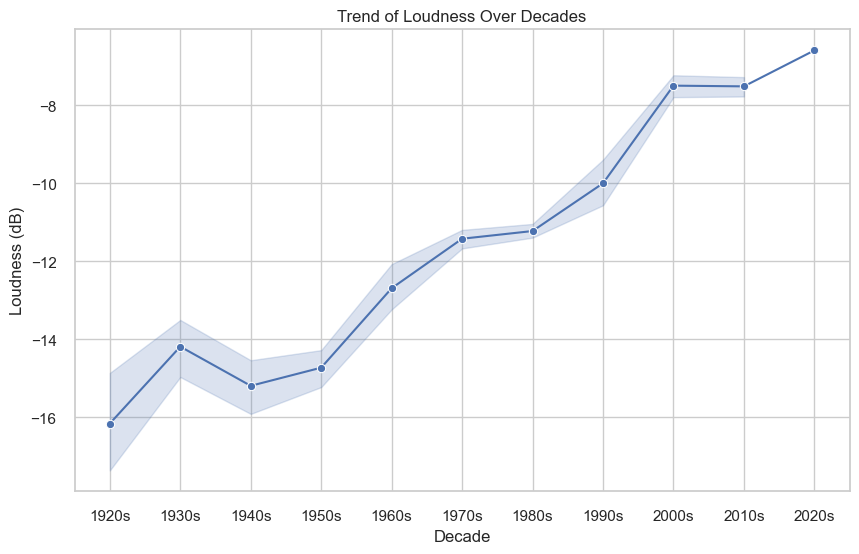

In [17]:
#Tremd of loudness - i dropped plotly as it was putting out erroro "ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed"

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_year, x='decade', y='loudness', marker='o')
plt.title('Trend of Loudness Over Decades')
plt.xlabel('Decade')
plt.ylabel('Loudness (dB)')
plt.show()

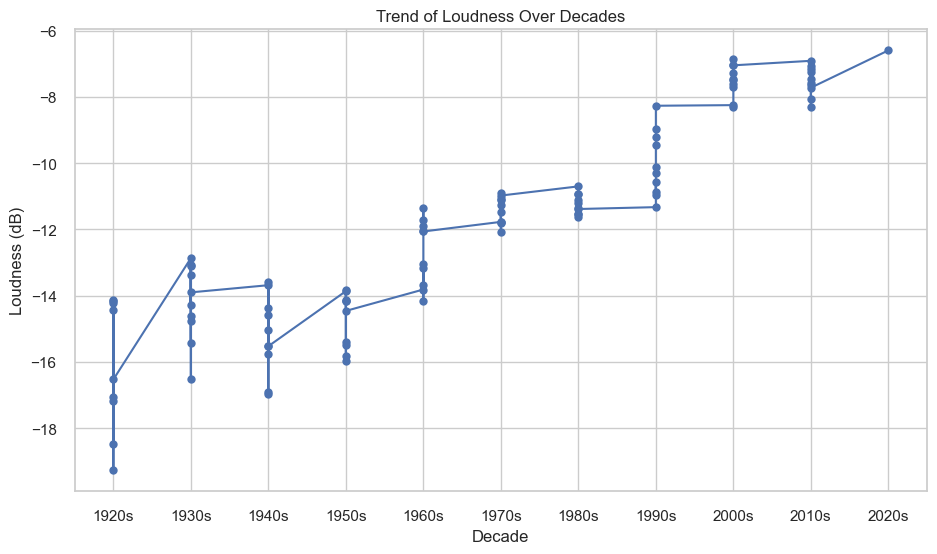

In [18]:
#trend of loudness over the years 
plt.plot(data_year['decade'], data_year['loudness'], marker='o')
plt.title('Trend of Loudness Over Decades')
plt.xlabel('Decade')
plt.ylabel('Loudness (dB)')
plt.grid(True)
plt.show()


In [ ]:
px.line(data_year, x='decade', y='loudness', title='Trend of loudness over decades')  # errors 

## trend of sound features across top 10 genres 

In [33]:
top10_genres=genre_data.sort_values(by="popularity", ascending=False).head(10)


In [ ]:
#trend of sound features across top 10 genres 

#  top10_genres is already defined
features = ['valence', 'energy', 'danceability', 'acousticness']

# Melt the DataFrame to long format
melted = top10_genres.melt(id_vars='genres', value_vars=features,
                           var_name='feature', value_name='value')

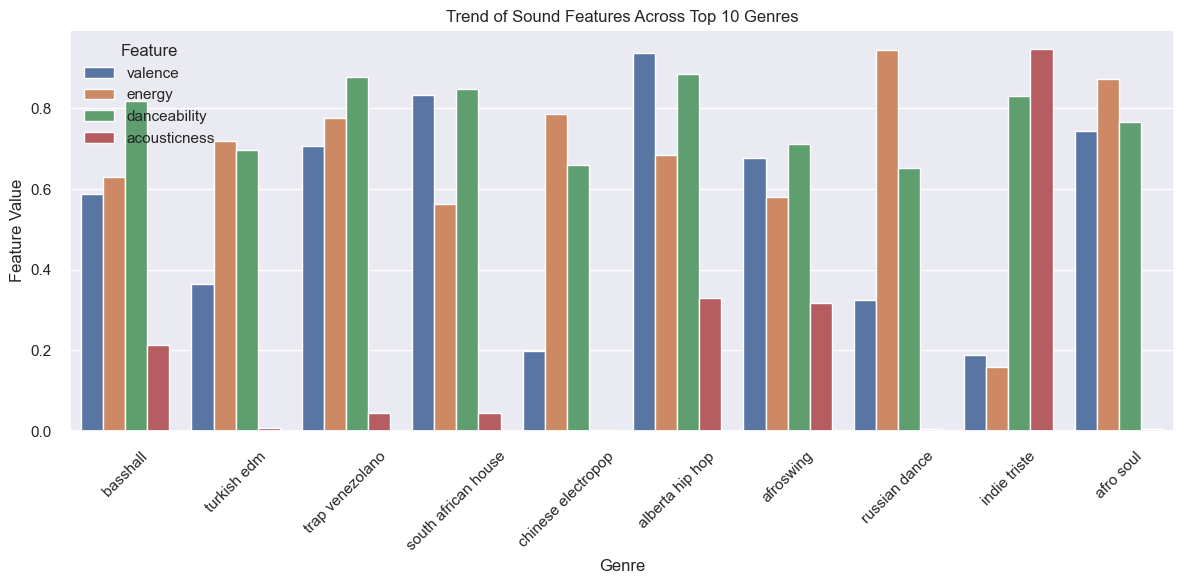

In [36]:
#plot with seaborn 

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='genres', y='value', hue='feature')

plt.title('Trend of Sound Features Across Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Feature Value')
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

## Word cloud

In [14]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Word cloud for the genres

In [38]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

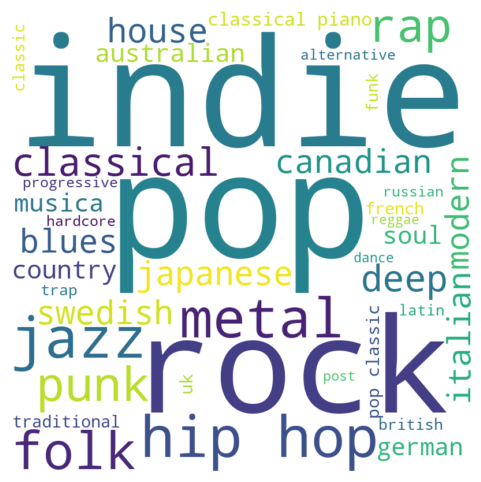

In [39]:
comment_words= " ".join(genre_data['genres'].astype(str))
wordcloud=WordCloud(width=800, height=800, background_color='white', max_words=40, min_font_size=10).generate(comment_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud for artist

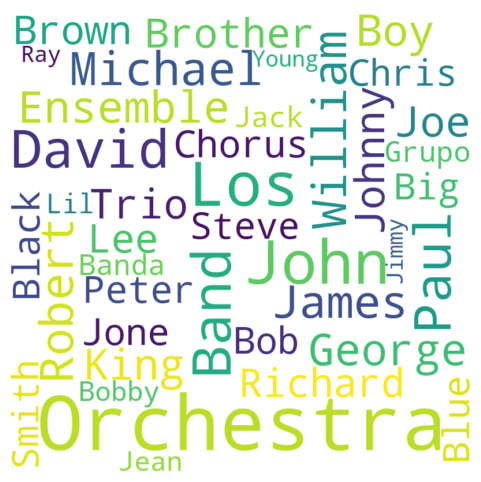

In [40]:
comment_words= " ".join(artist_data['artists'].astype(str))
wordcloud=WordCloud(width=800, height=800, background_color='white', min_word_length=3, max_words=40, min_font_size=10).generate(comment_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
artist_data[['popularity','artists']].sort_values('popularity', ascending=False).head(10)

,popularity,artists
20966,93.0,Ritt Momney
14354,92.0,Lele Pons
15070,90.0,Los Legendarios
11764,89.0,Jerry Di
23687,88.0,Surf Mesa
28263,88.0,salem ilese
7463,88.0,Emilee
213,87.0,A7S
16453,86.0,Master KG
18832,86.0,Osquel


## Correlation between popuarity and the main audio features

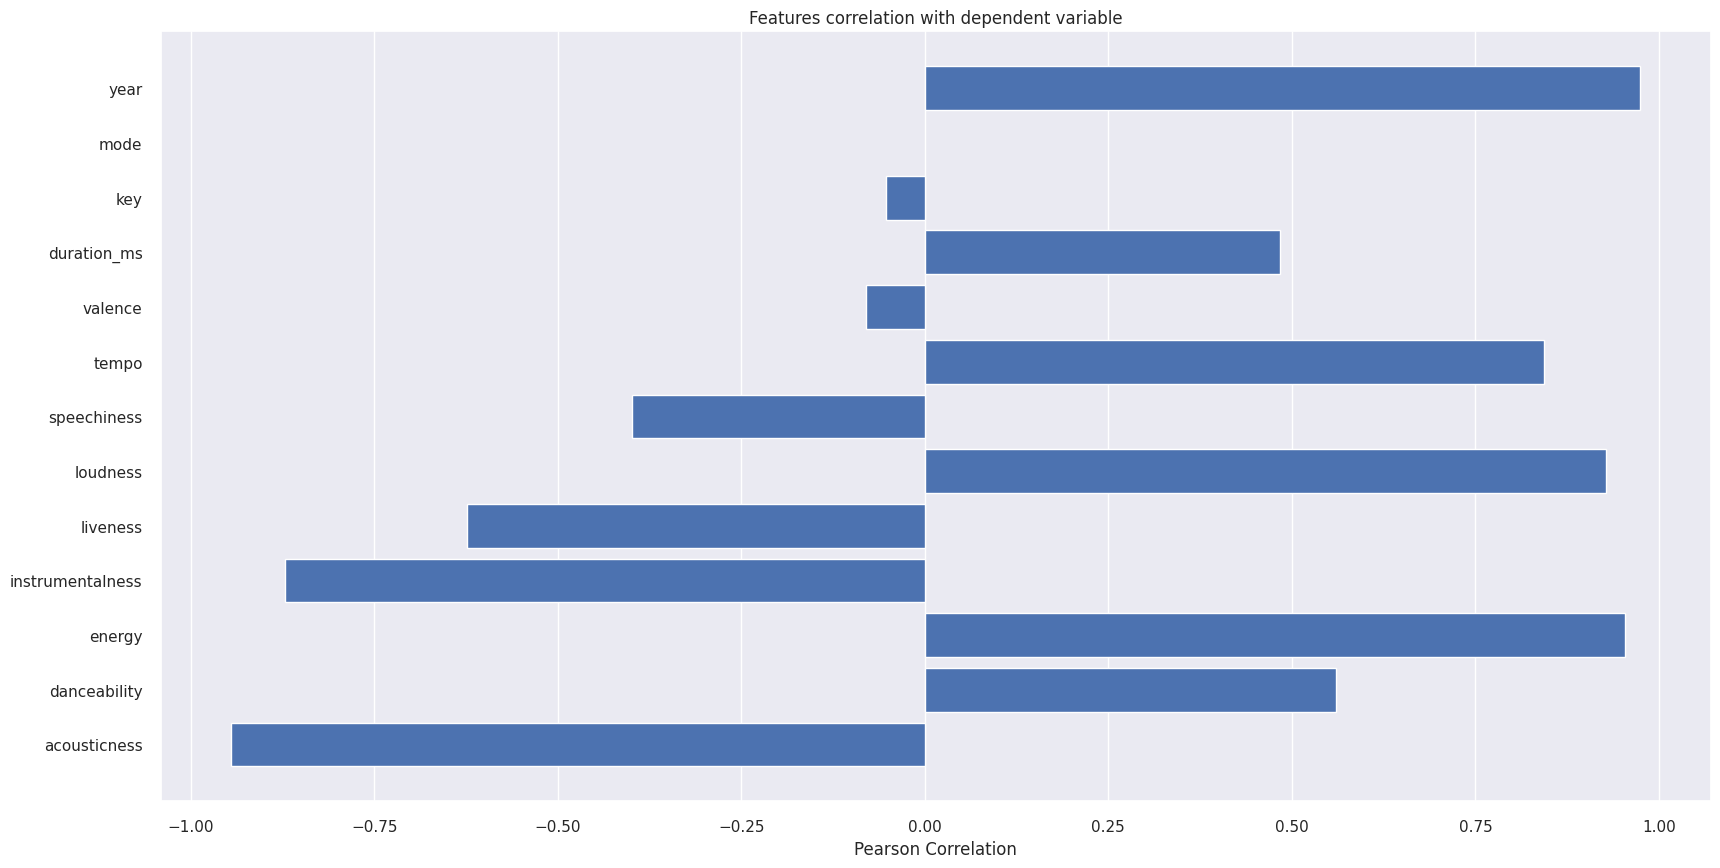

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [18]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode','year']

X, y = year_data[feature_names], year_data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,10)

# Fit the data to the visualizer
visualizer.fit(X, y)     
visualizer.show()

# Genre pairplot 

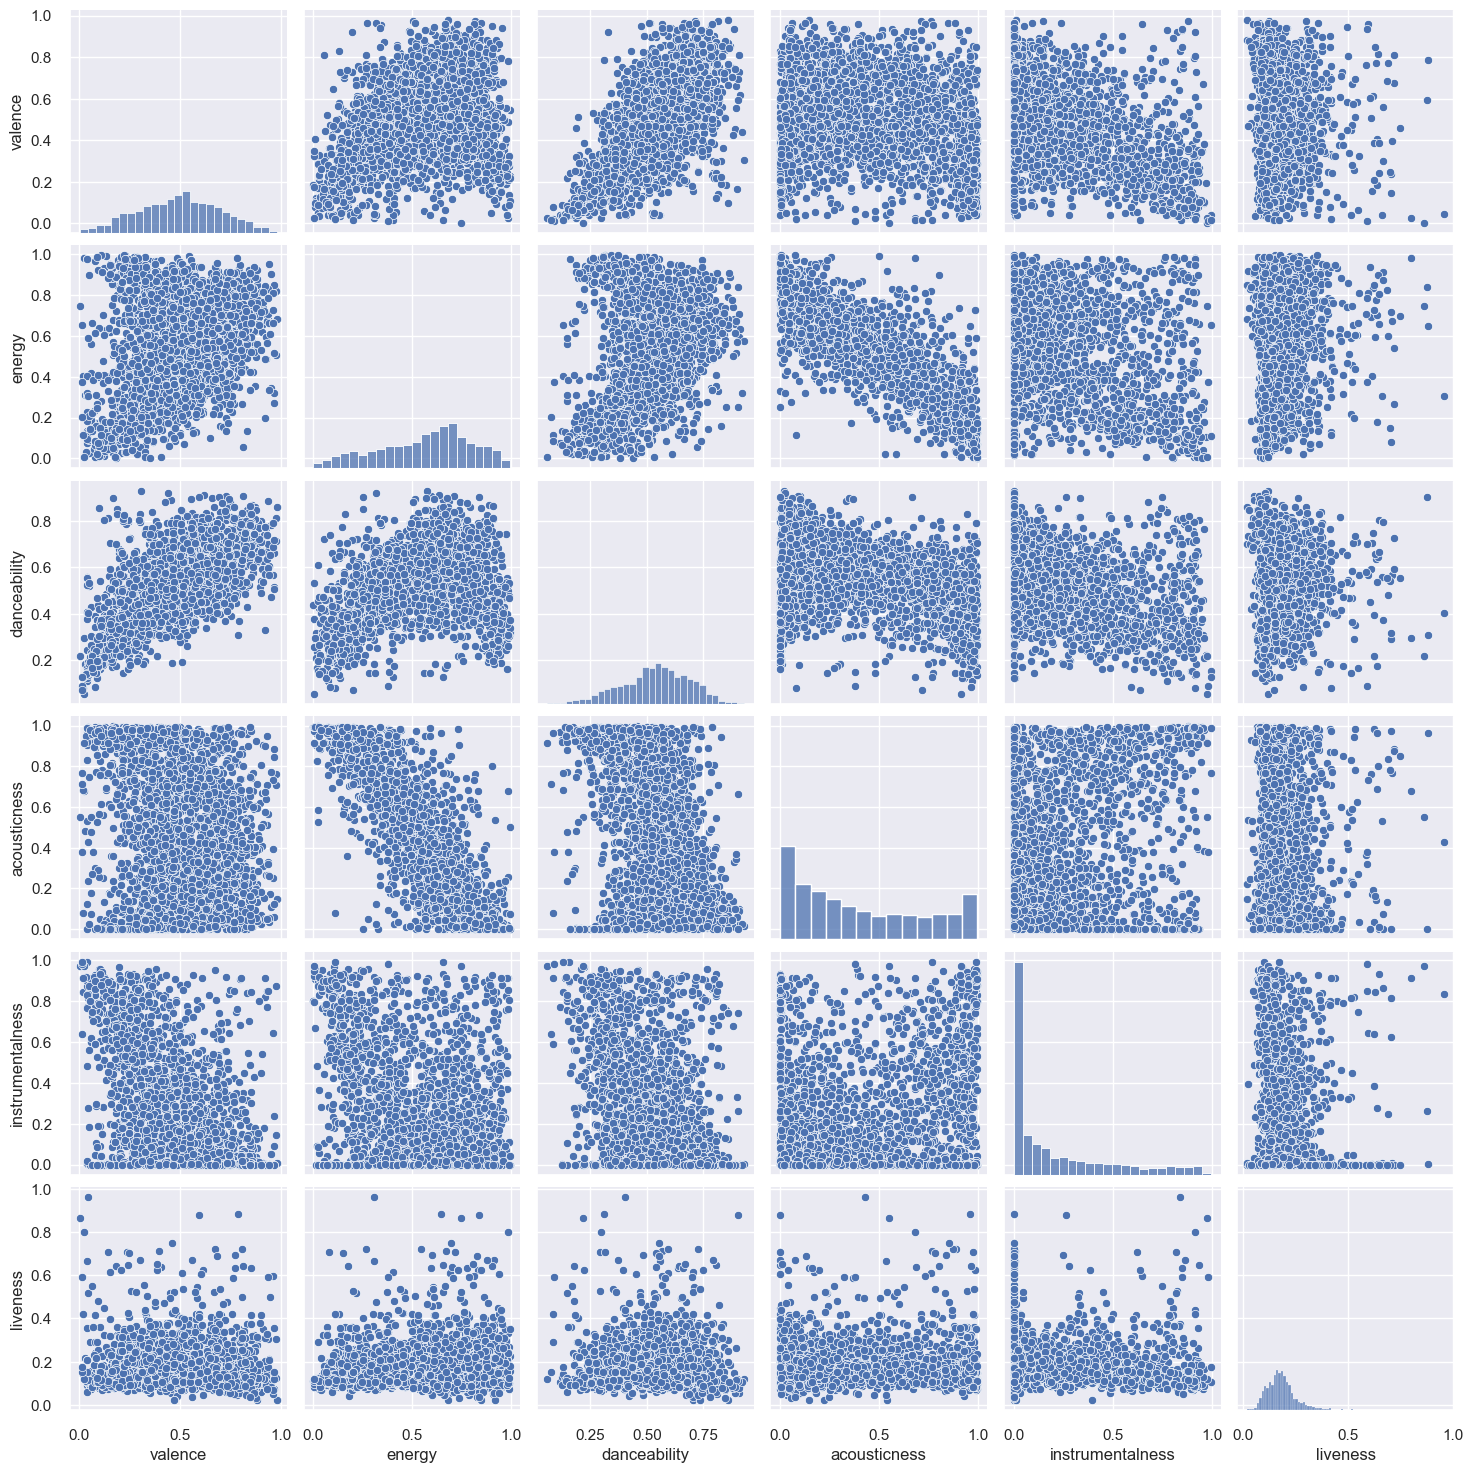

In [43]:
sns.pairplot(genre_data[['valence', 'energy', 'danceability', 'acousticness','instrumentalness', 'liveness']])
plt.show()

# STEP THREE !!

## Model creation


## k_means clustering for the genre data

In [44]:
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

## Visualization of the clusters using the dimensionality reduction library tsne

In [ ]:
from sklearn.manifold import TSNE # i keep getting error using plotly express , i had to modify to sns and matplotlib- see below 

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.009s...
[t-SNE] Computed neighbors for 2973 samples in 0.376s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106194
[t-SNE] KL divergence after 1000 iterations: 1.392586


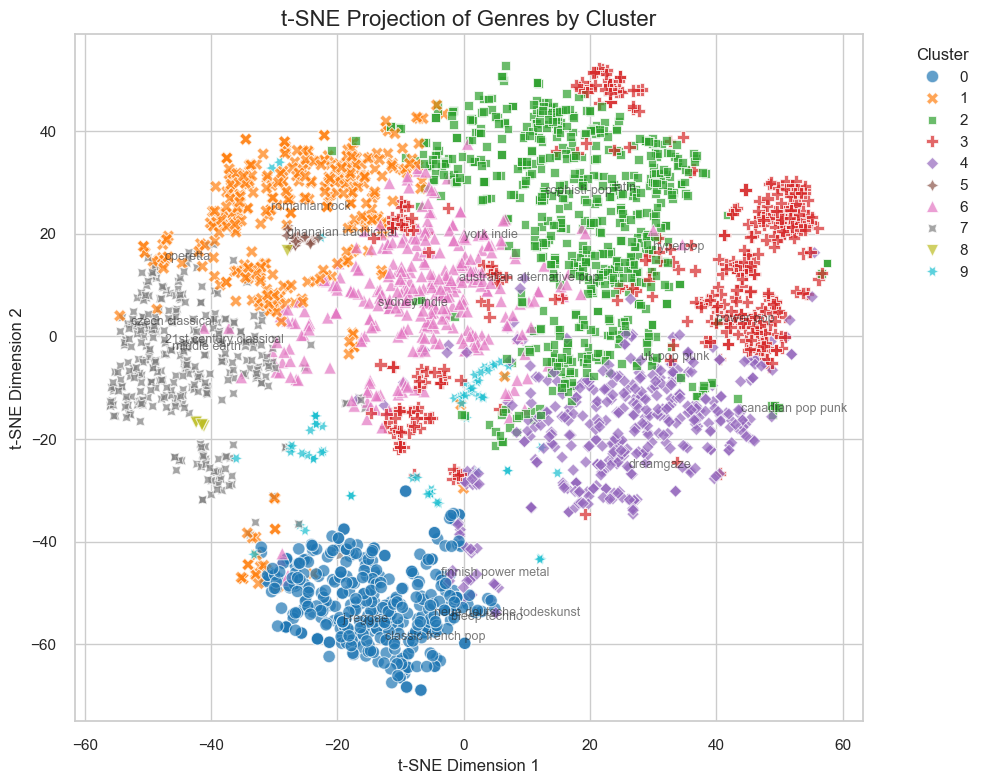

In [ ]:
#Using 
#Libraries used 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd

# Creating and fitting the t-SNE pipeline
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, verbose=1, random_state=42))
])

genre_embedding = tsne_pipeline.fit_transform(X)

#  DataFrame for plotting
projection = pd.DataFrame(genre_embedding, columns=['x', 'y'])
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

# Set plot style
sns.set(style="whitegrid", palette="muted")

# Using  scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=projection,
    x='x',
    y='y',
    hue='cluster',
    style='cluster',
    palette='tab10',
    s=80,
    alpha=0.7
)

# For more description -Annotate a few points with genre names
for i in range(0, len(projection), len(projection)//20):  # sample annotations
    plt.text(projection.loc[i, 'x'], projection.loc[i, 'y'], projection.loc[i, 'genres'],
             fontsize=9, alpha=0.6)

plt.title('t-SNE Projection of Genres by Cluster', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## K_means for the main data

In [8]:
from sklearn.pipeline import Pipeline

song_cluster_pipeline2 = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(include="number")
number_cols = list(X.columns)
song_cluster_pipeline2.fit(X)
song_cluster_labels = song_cluster_pipeline2.predict(X)
data['cluster_label'] = song_cluster_labels

In [9]:
#save model
import joblib

# Save the trained pipeline to a file
joblib.dump(song_cluster_pipeline2, 'song_cluster_pipeline2.pkl')

['song_cluster_pipeline2.pkl']

## Visualization of the clusters using the dimensionality reduction library pca

In [ ]:
#Plotly express code giving error - requires downloading nbformat 4.2.0 - 
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

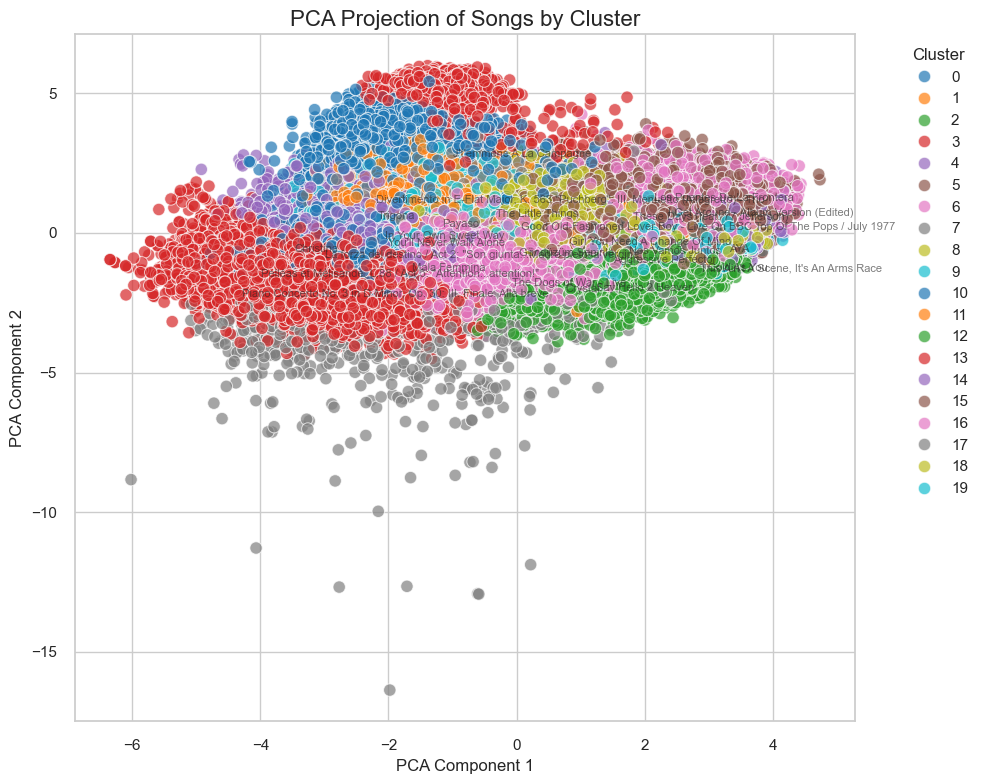

In [ ]:
# I used matplotlib and seavorn instead... figure not as appealing as plotly. 
#Libraies used 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# fitting the PCA pipeline
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components=2))
])

song_embedding = pca_pipeline.fit_transform(X)

# Create a DataFrame for plotting
projection = pd.DataFrame(song_embedding, columns=['x', 'y'])
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

# Set up plot style
sns.set(style="whitegrid", palette="muted")

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=projection,
    x='x',
    y='y',
    hue='cluster',
    palette='tab10',
    s=80,
    alpha=0.7
)

# Including annotation
for i in range(0, len(projection), len(projection)//25):  # ~4% of points
    plt.text(projection.loc[i, 'x'], projection.loc[i, 'y'], projection.loc[i, 'title'],
             fontsize=8, alpha=0.6)

plt.title('PCA Projection of Songs by Cluster', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [51]:
import streamlit as st